In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

# sklean metrics
from sklearn.metrics import *

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
plt.savefig('temp.png', transparent=True)
'''
sns.set(rc={'figure.figsize':(16,9)})
sns.set(style='white')

# Data exploration

In [3]:
# Data import
df_raw = pd.read_csv('creditCardData.csv')

#--------------------------------------------------------------------------------------------------
display(df_raw)
print(df_raw.info())

,id,age,education,marriage,owned_rent,credit_limit,payment_status_1,payment_status_2,payment_status_3,due_amt1,due_amt2,due_amt3,payment_amt1,payment_amt2,payment_amt3,default
0,1,57,2,1,1,50000,-1,0,-1,8617,5670,35835,2000,36681,10000,0
1,2,51,1,2,2,260000,-1,-1,-1,12261,21670,9966,21818,9966,8583,0
2,3,26,2,2,2,70000,2,0,0,41087,42445,45020,2007,3582,0,1
3,4,23,1,2,1,90000,0,0,0,4744,7070,0,5757,0,5398,0
4,5,27,1,2,1,60000,1,-2,-1,-109,-425,259,0,1000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,34,2,1,2,150000,2,2,2,39465,42829,41845,4000,0,2000,1
316,317,65,3,2,2,80000,0,0,0,84985,84247,81619,4000,2048,1300,0
317,318,33,2,2,1,10000,-2,-2,-2,0,0,0,0,0,0,0
318,319,41,2,1,2,170000,0,-1,-1,21170,9698,7360,9734,7373,6380,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                320 non-null    int64
 1   age               320 non-null    int64
 2   education         320 non-null    int64
 3   marriage          320 non-null    int64
 4   owned_rent        320 non-null    int64
 5   credit_limit      320 non-null    int64
 6   payment_status_1  320 non-null    int64
 7   payment_status_2  320 non-null    int64
 8   payment_status_3  320 non-null    int64
 9   due_amt1          320 non-null    int64
 10  due_amt2          320 non-null    int64
 11  due_amt3          320 non-null    int64
 12  payment_amt1      320 non-null    int64
 13  payment_amt2      320 non-null    int64
 14  payment_amt3      320 non-null    int64
 15  default           320 non-null    int64
dtypes: int64(16)
memory usage: 40.1 KB
None


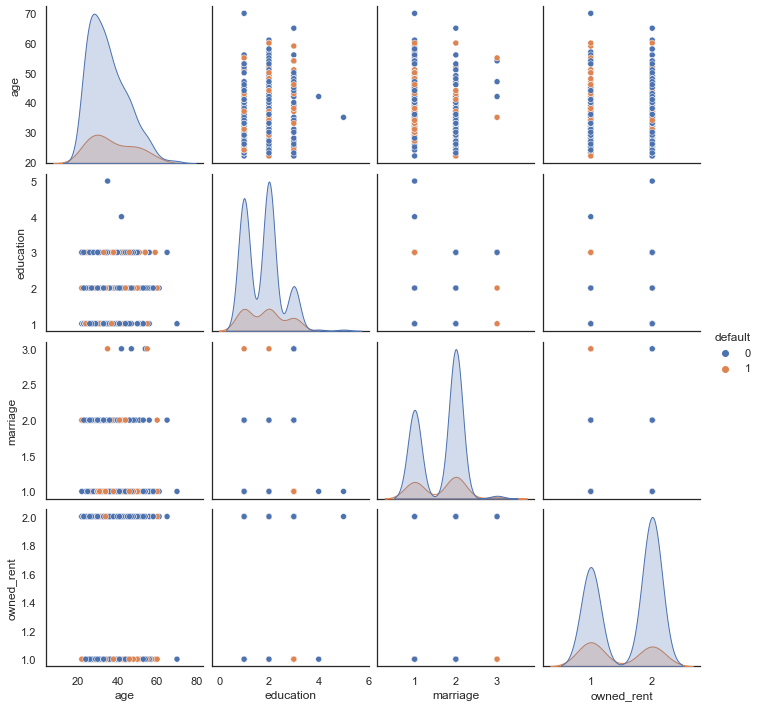

In [4]:
sns.pairplot(df_raw.loc[:, ['age', 'education', 'marriage', 'owned_rent', 'default']], hue = 'default')

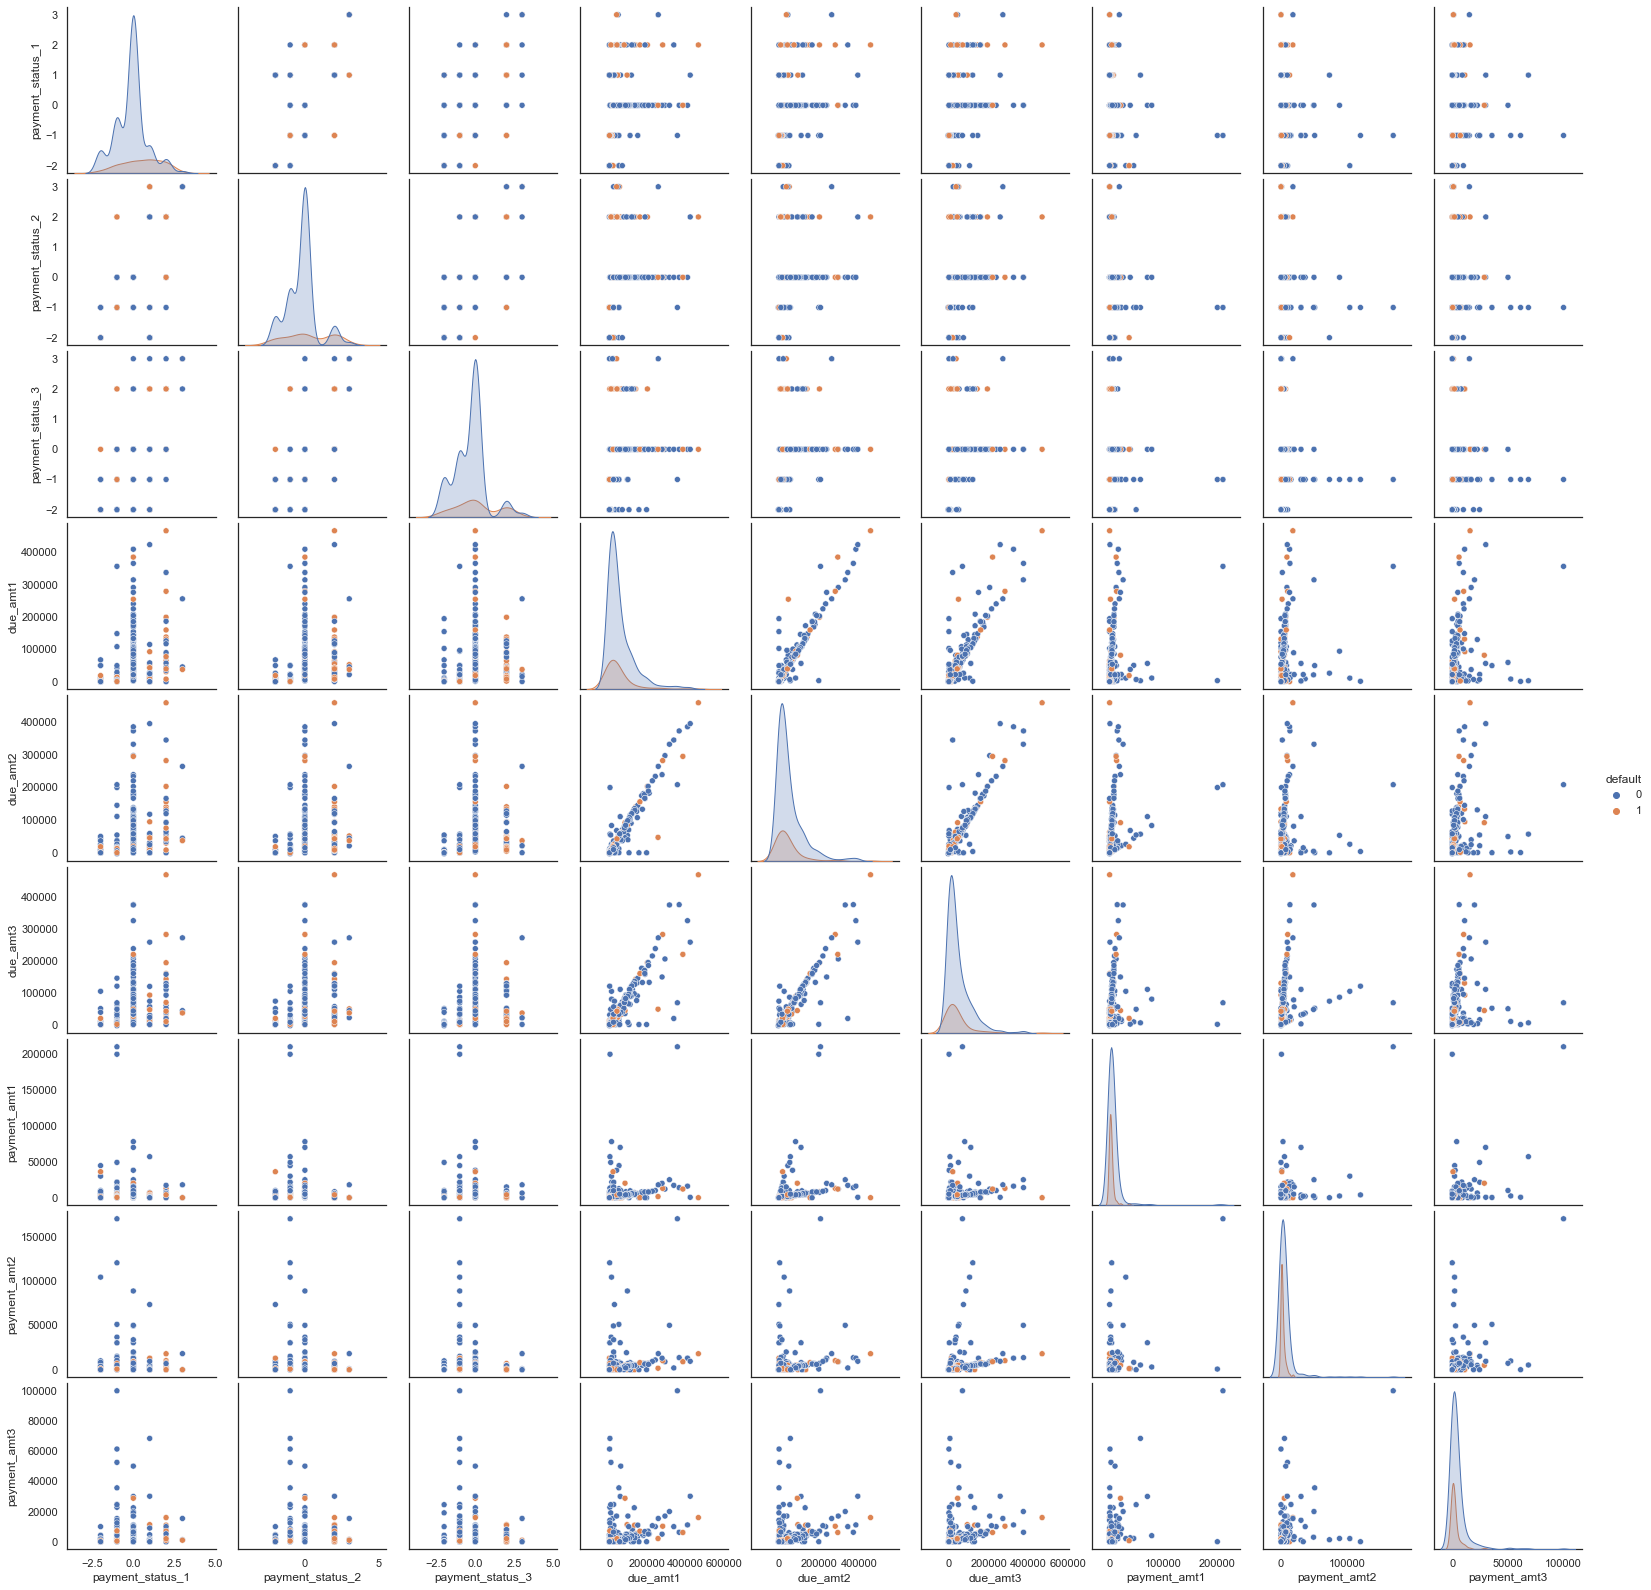

In [5]:
sns.pairplot(df_raw.iloc[:, 6:], hue = 'default')

In [6]:
print(f'Number of defaults: {df_raw.default.sum()}')
print(f'Number of non defaults: {len(df_raw.default) - df_raw.default.sum()}')

Number of defaults: 62
Number of non defaults: 258


# Creating new features

In [7]:
display(df_raw)

,id,age,education,marriage,owned_rent,credit_limit,payment_status_1,payment_status_2,payment_status_3,due_amt1,due_amt2,due_amt3,payment_amt1,payment_amt2,payment_amt3,default
0,1,57,2,1,1,50000,-1,0,-1,8617,5670,35835,2000,36681,10000,0
1,2,51,1,2,2,260000,-1,-1,-1,12261,21670,9966,21818,9966,8583,0
2,3,26,2,2,2,70000,2,0,0,41087,42445,45020,2007,3582,0,1
3,4,23,1,2,1,90000,0,0,0,4744,7070,0,5757,0,5398,0
4,5,27,1,2,1,60000,1,-2,-1,-109,-425,259,0,1000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,34,2,1,2,150000,2,2,2,39465,42829,41845,4000,0,2000,1
316,317,65,3,2,2,80000,0,0,0,84985,84247,81619,4000,2048,1300,0
317,318,33,2,2,1,10000,-2,-2,-2,0,0,0,0,0,0,0
318,319,41,2,1,2,170000,0,-1,-1,21170,9698,7360,9734,7373,6380,0


In [8]:
df_working = df_raw.copy()

#--------------------------------------------------------------------------------------------------
# Adding customer inactivity for 3 months 
df_working['inactive'] = 0 

df_working.loc[(df_working['payment_status_1'] == -2) &
               (df_working['payment_status_2'] == -2) &
               (df_working['payment_status_3'] == -2), 'inactive'] = 1

#--------------------------------------------------------------------------------------------------
# Has delayed payment
df_working['delayed'] = 0 

df_working.loc[(df_working['payment_status_1'] == 1) |
               (df_working['payment_status_1'] == 2) |
               (df_working['payment_status_1'] == 3) |
               (df_working['payment_status_2'] == 1) |
               (df_working['payment_status_2'] == 2) |
               (df_working['payment_status_2'] == 3) |
               (df_working['payment_status_3'] == 1) |
               (df_working['payment_status_3'] == 2) |
               (df_working['payment_status_3'] == 3) , 'delayed'] = 1

#--------------------------------------------------------------------------------------------------
# Ratio of amount paid to amount due 
df_working['paid/due_1'] = df_working['payment_amt1']/df_working['due_amt1']
df_working['paid/due_2'] = df_working['payment_amt2']/df_working['due_amt2']
df_working['paid/due_3'] = df_working['payment_amt3']/df_working['due_amt3']

df_working = df_working.fillna(0)
df_working = df_working.replace(np.inf, 0)


#--------------------------------------------------------------------------------------------------
# Average months delayed
# Check if dealayed first, then do average 
temp = df_raw.copy()
temp['payment_status_1'] = temp['payment_status_1'].apply(lambda x: 0 if x <= 0 else x)
temp['payment_status_2'] = temp['payment_status_2'].apply(lambda x: 0 if x <= 0 else x)
temp['payment_status_3'] = temp['payment_status_3'].apply(lambda x: 0 if x <= 0 else x)

temp['avg_delay'] = temp.loc[:,['payment_status_1', 'payment_status_2', 'payment_status_3']].mean(axis = 1)
df_working['avg_delay'] = temp['avg_delay']

#--------------------------------------------------------------------------------------------------
# Worst payment status in past 3 months 
df_working['worst_status'] = df_working.loc[:, ['payment_status_1',
                                                'payment_status_2',
                                                'payment_status_3']].max(axis=1)

#--------------------------------------------------------------------------------------------------
# Number of months with delayed payments 
'''
temp = df_raw.copy()
temp['payment_status_1'] = temp['payment_status_1'].apply(lambda x: 0 if x <= 0 else 1)
temp['payment_status_2'] = temp['payment_status_2'].apply(lambda x: 0 if x <= 0 else 1)
temp['payment_status_3'] = temp['payment_status_3'].apply(lambda x: 0 if x <= 0 else 1)

temp['#_months_with_delay'] = temp.loc[:,['payment_status_1', 'payment_status_2', 'payment_status_3']].sum(axis = 1)
df_working['#_months_with_delay'] = temp['#_months_with_delay']
'''

df_working.head(10)

,id,age,education,marriage,owned_rent,credit_limit,payment_status_1,payment_status_2,payment_status_3,due_amt1,...,payment_amt2,payment_amt3,default,inactive,delayed,paid/due_1,paid/due_2,paid/due_3,avg_delay,worst_status
0,1,57,2,1,1,50000,-1,0,-1,8617,...,36681,10000,0,0,0,0.232099,6.469312,0.279057,0.000000,0
1,2,51,1,2,2,260000,-1,-1,-1,12261,...,9966,8583,0,0,0,1.779463,0.459898,0.861228,0.000000,-1
2,3,26,2,2,2,70000,2,0,0,41087,...,3582,0,1,0,1,0.048848,0.084392,0.000000,0.666667,2
3,4,23,1,2,1,90000,0,0,0,4744,...,0,5398,0,0,0,1.213533,0.000000,0.000000,0.000000,0
4,5,27,1,2,1,60000,1,-2,-1,-109,...,1000,0,1,0,1,-0.000000,-2.352941,0.000000,0.333333,1
5,6,26,1,2,1,50000,0,0,0,15329,...,1500,1000,0,0,0,0.097854,0.090498,0.057156,0.000000,0
6,7,27,1,2,2,230000,-1,-1,-1,16646,...,13281,15339,0,0,0,1.037486,0.769244,1.156264,0.000000,-1
7,8,33,2,2,1,50000,2,0,0,30518,...,1500,1000,1,0,1,0.056295,0.050645,0.045245,0.666667,2
8,9,37,2,1,2,140000,0,0,0,59504,...,3000,3000,0,0,0,0.050417,0.048746,0.047676,0.000000,0
9,10,32,2,2,1,380000,-1,-1,-1,22401,...,15138,24677,0,0,0,0.961564,0.702786,1.630567,0.000000,-1


In [9]:
df = df_working.copy()

y = df.default
X = df.drop(["default", "id"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#--------------------------------------------------------------------------------------------------

lr = LogisticRegression(max_iter=500, penalty="none")

sfs = SequentialFeatureSelector(lr, direction='backward')
sfs.fit(X_train, y_train)

features = list(X_train.columns[sfs.get_support()])
features.append('default')

print(f'Features selected: {features}')

Features selected: ['age', 'education', 'payment_status_1', 'payment_status_2', 'payment_status_3', 'due_amt3', 'payment_amt1', 'payment_amt3', 'avg_delay', 'worst_status', 'default']


In [10]:
X_train

,age,education,marriage,owned_rent,credit_limit,payment_status_1,payment_status_2,payment_status_3,due_amt1,due_amt2,...,payment_amt1,payment_amt2,payment_amt3,inactive,delayed,paid/due_1,paid/due_2,paid/due_3,avg_delay,worst_status
209,29,1,2,1,460000,0,0,0,410033,385394,...,16088,13039,11127,0,0,0.039236,0.033833,0.034167,0.000000,0
140,33,2,2,2,170000,1,-1,-1,0,7042,...,7042,2986,0,0,1,0.000000,0.424027,0.000000,0.333333,1
217,26,1,2,1,90000,-1,-1,-1,10750,100,...,100,200,0,0,0,0.009302,2.000000,0.000000,0.000000,-1
194,50,1,1,1,110000,0,0,0,36802,38210,...,2000,3000,2000,0,0,0.054345,0.078513,0.049678,0.000000,0
5,26,1,2,1,50000,0,0,0,15329,16575,...,1500,1500,1000,0,0,0.097854,0.090498,0.057156,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,70,1,1,1,350000,0,0,0,100895,70244,...,3371,2089,3008,0,0,0.033411,0.029739,0.046392,0.000000,0
192,30,1,2,2,60000,2,2,2,34735,33895,...,0,3200,1500,0,1,0.000000,0.094409,0.041062,2.000000,2
117,56,1,2,2,30000,-1,0,0,29033,17013,...,1283,7024,7024,0,0,0.044191,0.412861,1.000000,0.000000,0
47,25,1,2,1,330000,0,0,0,46140,45781,...,2504,4007,5056,0,0,0.054270,0.087525,0.105029,0.000000,0


# Functions

In [11]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Standard logistic regression

The Training Accuracy is:  0.8203125
The Testing Accuracy is:  0.75
                 precision    recall  f1-score   support

did not default       0.75      0.50      0.60        48
        default       0.25      0.50      0.33        16

       accuracy                           0.50        64
      macro avg       0.50      0.50      0.47        64
   weighted avg       0.62      0.50      0.53        64

The True Positive Rate is: [0.5 0.5]
The Precision is: [0.75 0.25]
The False positive rate is: [0.5 0.5]
The False Negative Rate is:  [0.5 0.5]

The average TPR is: 0.5
The average Precision is: 0.5
The average False positive rate is: 0.5
The average False Negative Rate is: 0.5


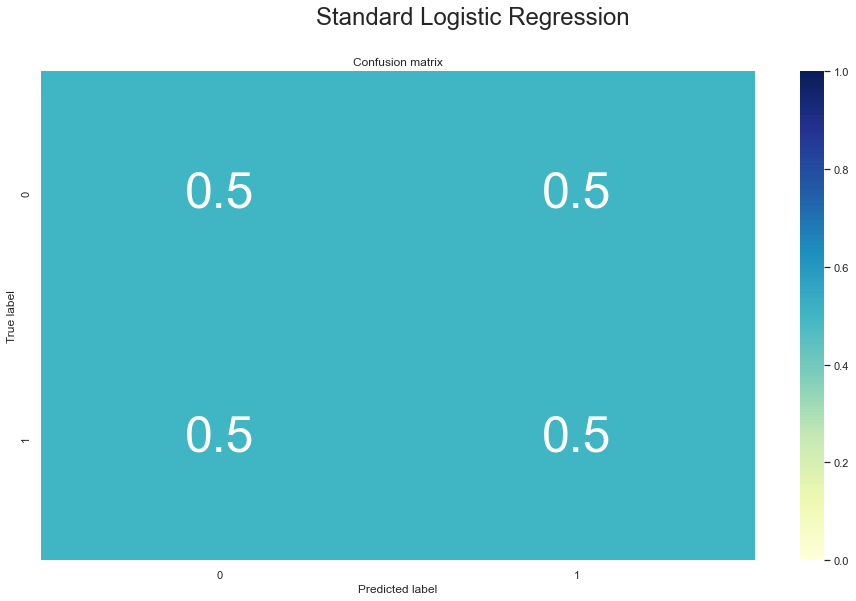

In [59]:
df = df_working.copy()

y = df.default
X = df.drop(["default", "id"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#--------------------------------------------------------------------------------------------------
model = LogisticRegression(max_iter=500, penalty='none')
model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.236630).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = plt.figure(figsize=(16,9))
fig = plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.suptitle('Standard Logistic Regression', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.235475, G-Mean=0.627


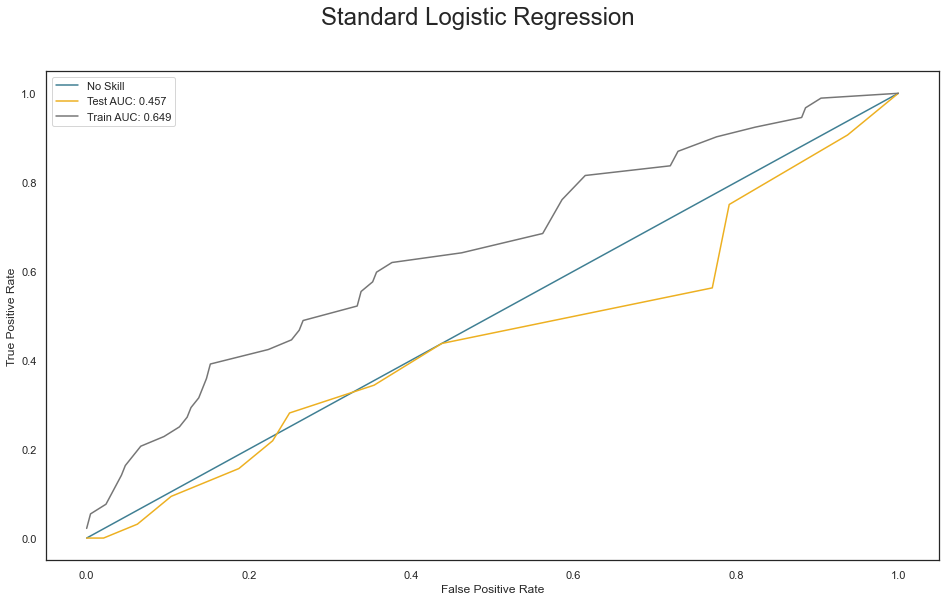

In [47]:
#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Standard Logistic Regression', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

# Feature selection

In [48]:
df = df_working.copy()

y = df.default
X = df.drop(["default", "id"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#--------------------------------------------------------------------------------------------------
lr = LogisticRegression(max_iter=500, penalty="none")

sfs = SequentialFeatureSelector(lr, direction='backward')
sfs.fit(X_train, y_train)

features = list(X_train.columns[sfs.get_support()])
features.append('default')

print(f'Features selected: {features}')
print(len(features))

Features selected: ['age', 'education', 'payment_status_1', 'payment_status_2', 'payment_status_3', 'due_amt3', 'payment_amt1', 'payment_amt3', 'avg_delay', 'worst_status', 'default']
11


The Training Accuracy is:  0.80078125
The Testing Accuracy is:  0.828125
                 precision    recall  f1-score   support

did not default       0.91      0.60      0.73        53
        default       0.28      0.73      0.40        11

       accuracy                           0.62        64
      macro avg       0.60      0.67      0.56        64
   weighted avg       0.80      0.62      0.67        64

The True Positive Rate is: [0.60377358 0.72727273]
The Precision is: [0.91428571 0.27586207]
The False positive rate is: [0.27272727 0.39622642]
The False Negative Rate is:  [0.39622642 0.27272727]

The average TPR is: 0.6655231560891939
The average Precision is: 0.5950738916256157
The average False positive rate is: 0.3344768439108062
The average False Negative Rate is: 0.3344768439108062


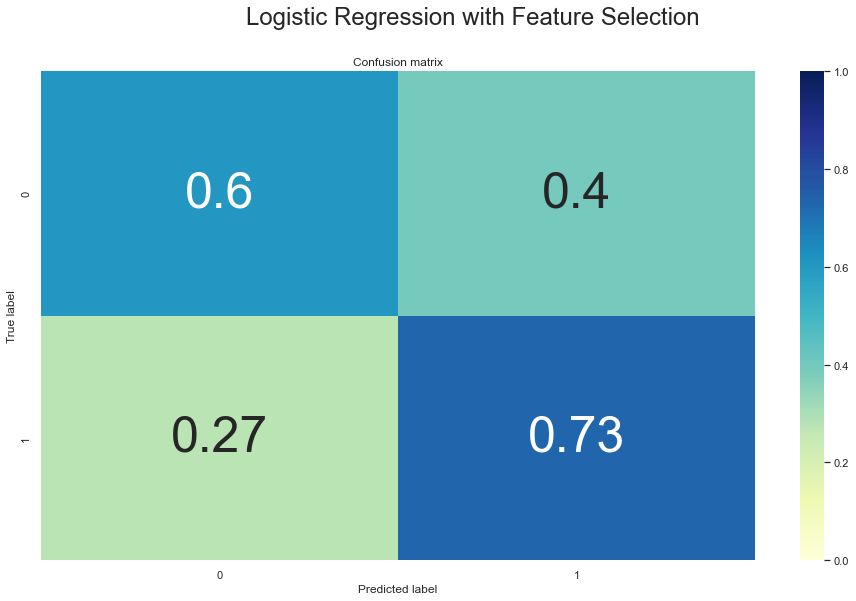

In [60]:
#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]

y = df.default
X = df.drop(["default"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

#--------------------------------------------------------------------------------------------------
model = LogisticRegression(max_iter=500, penalty="none")
model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.236630).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = plt.figure(figsize=(16,9))
fig = plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.suptitle('Logistic Regression with Feature Selection', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.206454, G-Mean=0.665


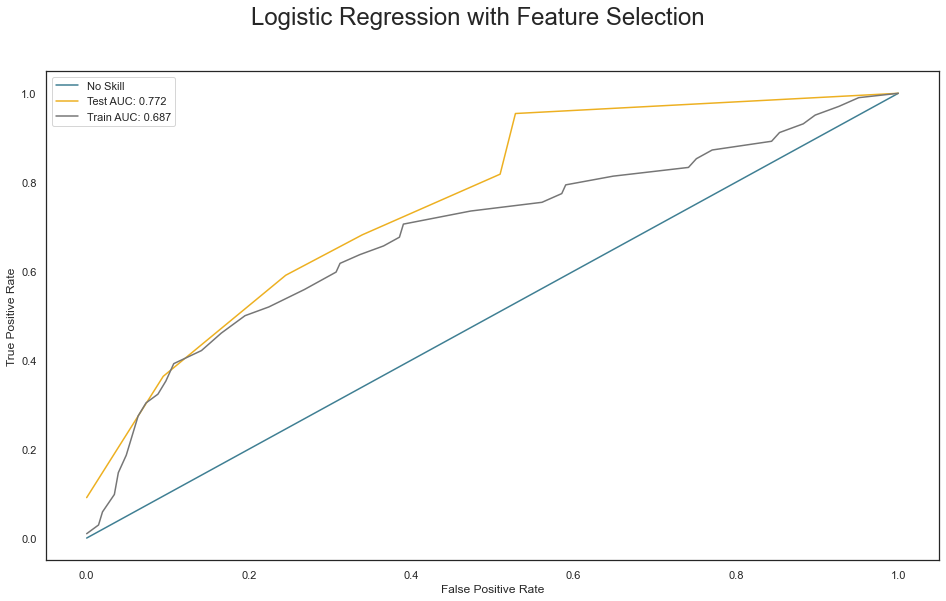

In [50]:
#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Feature Selection', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

# Regularisation 

In [51]:
C_List = np.logspace(-8, 8, 100)

#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]

y = df.default
X = df.drop(["default"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

#--------------------------------------------------------------------------------------------------
kf = KFold(n_splits=3, random_state=0, shuffle=True)
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs', max_iter=500)

Log_reg3.fit(X_train, y_train)
print("Score: ", Log_reg3.score(X_test, y_test))

y_pred = Log_reg3.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print("AUC: ", auc)

print("The optimal C parameter is: ", Log_reg3.C_)

Score:  0.828125
AUC:  0.8662092624356776
The optimal C parameter is:  [0.02915053]


The Training Accuracy is:  0.796875
The Testing Accuracy is:  0.828125
                 precision    recall  f1-score   support

did not default       0.91      0.57      0.70        53
        default       0.26      0.73      0.38        11

       accuracy                           0.59        64
      macro avg       0.58      0.65      0.54        64
   weighted avg       0.80      0.59      0.64        64

The True Positive Rate is: [0.56603774 0.72727273]
The Precision is: [0.90909091 0.25806452]
The False positive rate is: [0.27272727 0.43396226]
The False Negative Rate is:  [0.43396226 0.27272727]

The average TPR is: 0.646655231560892
The average Precision is: 0.5835777126099706
The average False positive rate is: 0.35334476843910806
The average False Negative Rate is: 0.35334476843910806


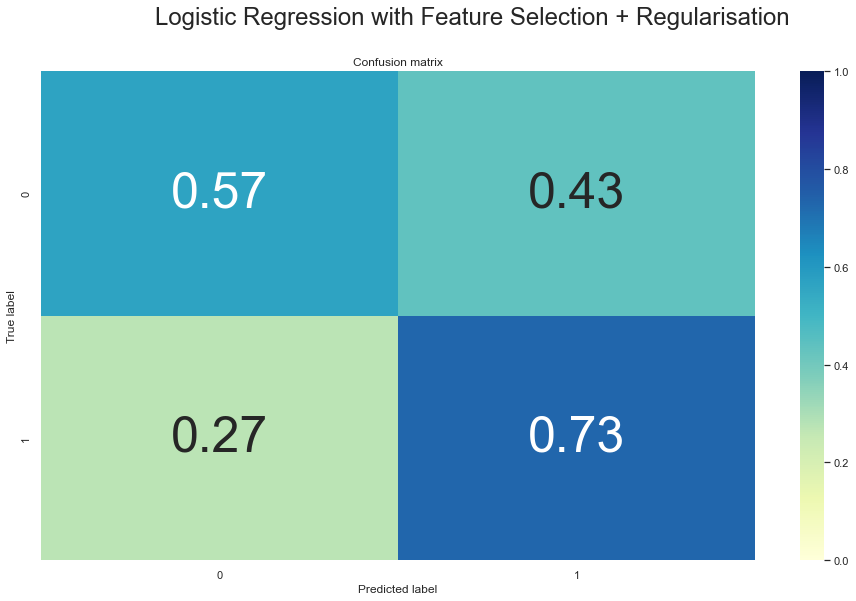

In [61]:
#--------------------------------------------------------------------------------------------------
model = LogisticRegression(max_iter=500, penalty="l2", C=0.02915053)
model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.236630).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.suptitle('Logistic Regression with Feature Selection + Regularisation', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


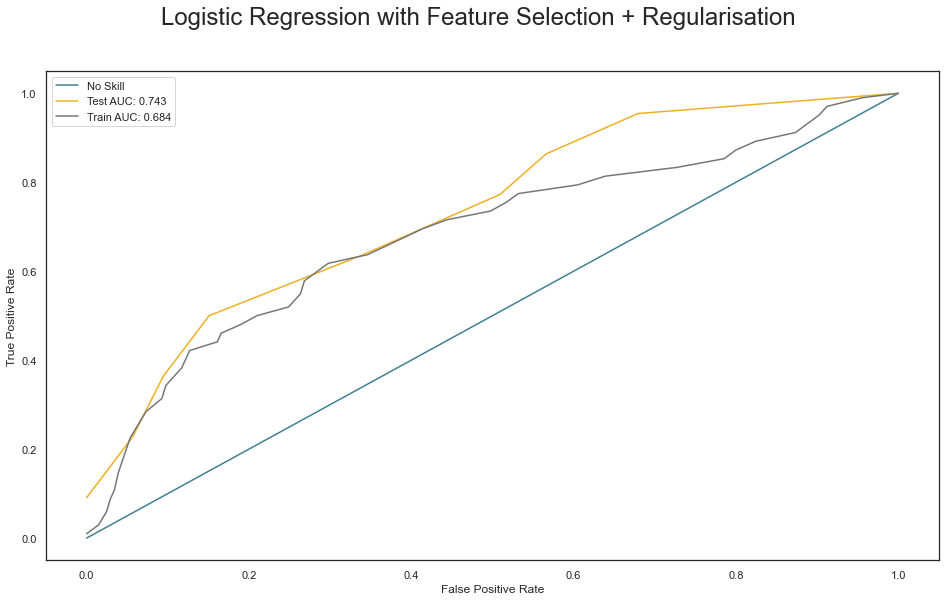

In [53]:
#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')

'''
gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
'''

#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Feature Selection + Regularisation', fontsize = 24)
plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

# Hyperparameter tuning

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

#--------------------------------------------------------------------------------------------------
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-8,8,50),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]
y = df.default
X = df.drop(["default"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#--------------------------------------------------------------------------------------------------
model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.825000 using {'C': 132.57113655901054, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\seanl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

The Training Accuracy is:  0.84375
The Testing Accuracy is:  0.734375
                 precision    recall  f1-score   support

did not default       0.91      0.83      0.87        48
        default       0.60      0.75      0.67        16

       accuracy                           0.81        64
      macro avg       0.75      0.79      0.77        64
   weighted avg       0.83      0.81      0.82        64

The True Positive Rate is: [0.83333333 0.75      ]
The Precision is: [0.90909091 0.6       ]
The False positive rate is: [0.25       0.16666667]
The False Negative Rate is:  [0.16666667 0.25      ]

The average TPR is: 0.7916666666666667
The average Precision is: 0.7545454545454545
The average False positive rate is: 0.20833333333333331
The average False Negative Rate is: 0.20833333333333331


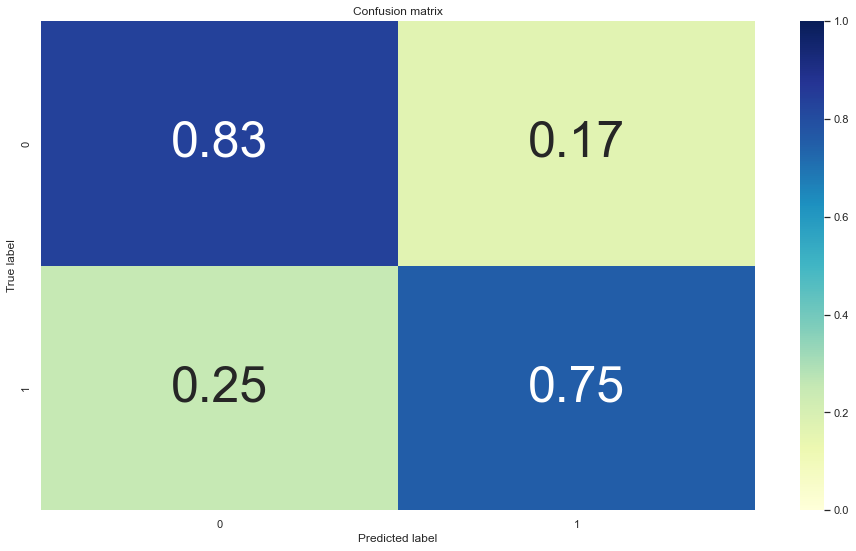

In [64]:
df = df_working.copy()
df = df.loc[:,features]
y = df.default
X = df.drop(["default"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#--------------------------------------------------------------------------------------------------
model = LogisticRegression(max_iter=500, penalty="l1", C=13.89495494373136, solver='liblinear')
model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.236630).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.savefig('temp.png', transparent=True)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)


C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.172477, G-Mean=0.716


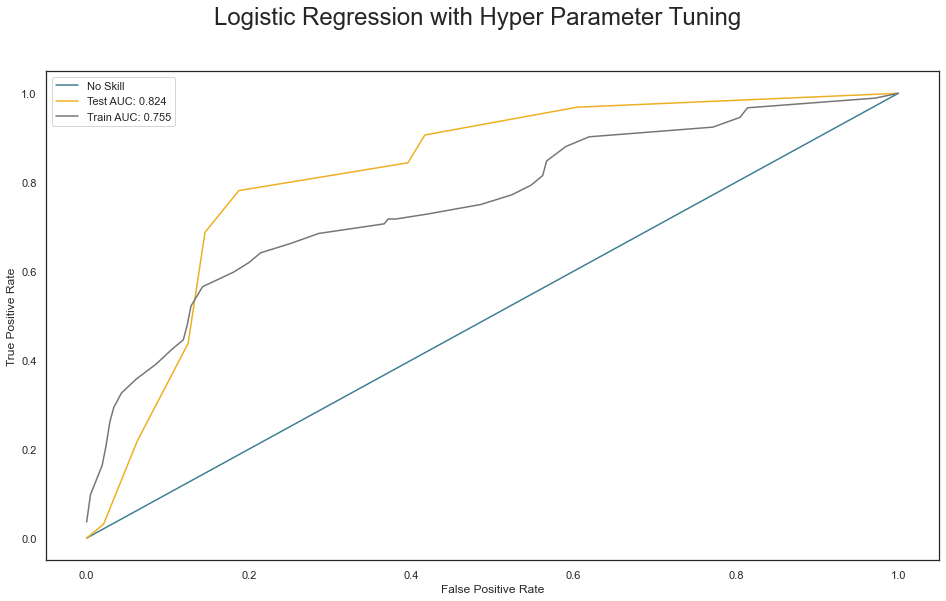

In [65]:
 #--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Usable graph

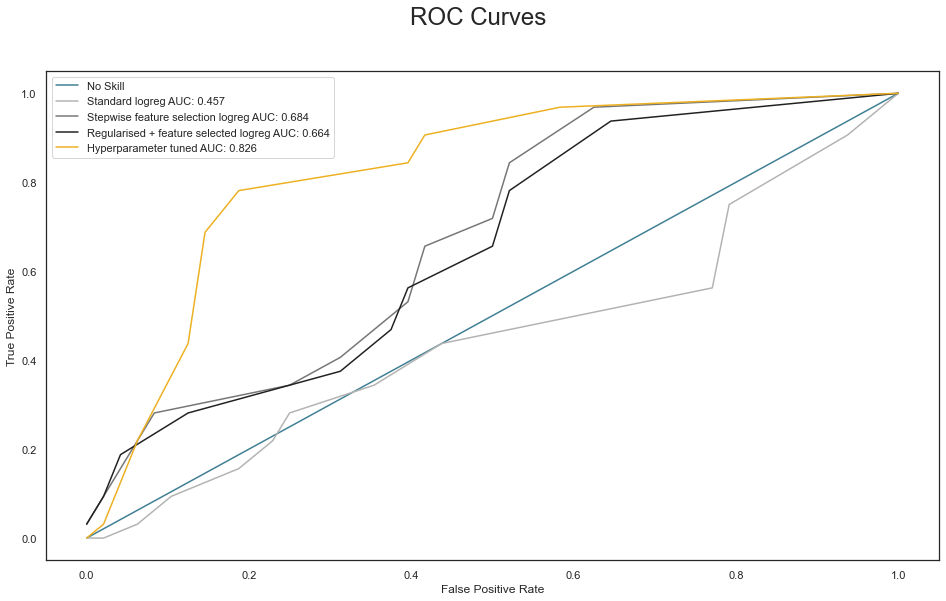

In [66]:
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot(x=[0,1], y=[0,1], label='No Skill', color='#3f7f93')


#--------------------------------------------------------------------------------------------------
df = df_working.copy()
y = df.default
X = df.drop(["default", "id"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = LogisticRegression(max_iter=500, penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, ci=None, label=f'Standard logreg AUC: {round(auc,3)}',
                  color='#b3b3b3' )

#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]
y = df.default
X = df.drop(["default"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = LogisticRegression(max_iter=500, penalty="none")
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, ci=None, label=f'Stepwise feature selection logreg AUC: {round(auc,3)}',
                  color='#767676')

#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]
y = df.default
X = df.drop(["default"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = LogisticRegression(max_iter=500, penalty="l2", C=0.02915053)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, ci=None, label=f'Regularised + feature selected logreg AUC: {round(auc,3)}',
                  color='#212121')

#--------------------------------------------------------------------------------------------------
df = df_working.copy()
df = df.loc[:,features]
y = df.default
X = df.drop(["default"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = LogisticRegression(max_iter=500, penalty="l1", C=13.89495494373136, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, ci=None, label=f'Hyperparameter tuned AUC: {round(auc,3)}',
                  color='#edb021')

#--------------------------------------------------------------------------------------------------
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('ROC Curves', fontsize = 24)

plt.legend()
plt.savefig('temp.png', transparent=True)
plt.show()